In [21]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [32]:
traindata = pd.read_csv("dataset/final_news.csv") 
train_facebook_economy = pd.read_csv("dataset/Facebook_Economy.csv") 
train_facebook_microsoft = pd.read_csv("dataset/Facebook_Microsoft.csv")
train_Facebook_Obama = pd.read_csv("dataset/Facebook_Obama.csv")
train_Facebook_Palestine = pd.read_csv("dataset/Facebook_Palestine.csv")

In [3]:
traindata.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,4/2/02 0:00,0.000000,-0.053300
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,9/20/08 0:00,0.208333,-0.156386
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,1/28/12 0:00,-0.425210,0.139754
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,3/1/15 0:06,0.000000,0.026064
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,3/1/15 0:11,0.000000,0.141084


In [4]:
traindata['Headline'][0]

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [34]:
bigdata_facebook = pd.concat([train_facebook_economy, train_facebook_microsoft, train_Facebook_Obama, train_Facebook_Palestine], ignore_index=True)
facebook_merge = pd.merge(traindata, bigdata_facebook, on="IDLink") 


In [35]:
facebook_merge.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,TS1,TS2,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2/28/16 14:03,0.000000,-0.005906,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2/28/16 14:03,0.000000,-0.005906,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 9:29,0.000000,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 9:29,0.000000,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 0:15,-0.243068,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
topic_detection['Topic'].value_counts()

economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64

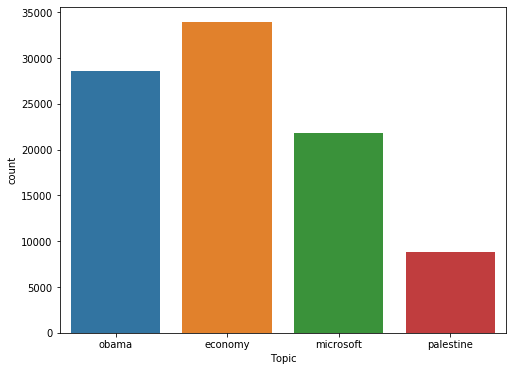

In [12]:
plt.figure(figsize = (8,6))
sea.countplot(topic_detection['Topic'])
plt.show()

In [54]:
X = facebook_merge['Headline']
y = facebook_merge['Topic']

## Data Preprocessing

In [52]:
text = facebook_merge['Headline']

#removing pantuations and numeric data from the list of strings 
text_data = []
for i in range(len(text)):
    line = re.sub('[^a-zA-Z]+', ' ',str(text[i]))

    line = [ps.stem(i) for i in word_tokenize(line) if i not in stopwords.words('english')] #removing stopwords
    
    line = ' '.join(line)
    
    text_data.append(line)

In [56]:
X = text_data
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [76]:
#CountVectorizer converts the given text into vectors
vector = CountVectorizer()
x_train = vector.fit_transform(x_train).toarray()

In [99]:
#x_test = vector.transform(x_test).toarray()

In [87]:
x_test = x_test.toarray()

In [69]:
#converting Topic column to numeric labels
lb_enc = LabelEncoder()
y_train = lb_enc.fit_transform(y_train)
y_test = lb_enc.transform(y_test)

In [16]:
#0 - Economy
#1 - Microsoft
#2 - Obama
#3 - Palestine

In [70]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB


In [89]:
#fitting the data to the model
multi_NB = MultinomialNB()
multi_NB.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
pred = multi_NB.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score, classification_report

In [102]:
print('Accuracy Score : {}'. format(accuracy_score(y_test, pred)))

Accuracy Score : 0.9623875715453802


In [98]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7606
           1       0.97      0.98      0.98      4590
           2       0.94      0.98      0.96      6732
           3       0.95      0.94      0.95      1863

    accuracy                           0.96     20791
   macro avg       0.96      0.96      0.96     20791
weighted avg       0.96      0.96      0.96     20791



## The model doesn't seem to look over fitted because all classes have closely same F1 scores, it looks balanced

# NLP with deep Learning

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Activation, Embedding, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [107]:
tokenizer = Tokenizer(oov_token = '<UNK>')
tokenizer.fit_on_texts(text_data)
word_index = tokenizer.word_index

print(len(word_index))

30709


In [109]:
sequences = tokenizer.texts_to_sequences(text_data)
padded = pad_sequences(sequences, padding = 'post')

In [129]:
y = lb.transform(y)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.3, random_state=42)

In [168]:
model = Sequential()
model.add(Embedding(31324,40, input_length = 62))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 62, 40)            1252960   
_________________________________________________________________
lstm_24 (LSTM)               (None, 62, 128)           86528     
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 260       
Total params: 1,389,156
Trainable params: 1,389,156
Non-trainable params: 0
_________________________________________________________________


In [169]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [170]:
epochs = 5
batch_size = 500

In [171]:
y_train.shape

(58214,)

In [173]:
model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size)

Epoch 1/5
58214/58214 [==============================] - 118s 2ms/sample - loss: 0.7257 - acc: 0.6256
Epoch 2/5
58214/58214 [==============================] - 119s 2ms/sample - loss: 0.2053 - acc: 0.9450
Epoch 3/5
58214/58214 [==============================] - 118s 2ms/sample - loss: 0.1127 - acc: 0.9648
Epoch 4/5
58214/58214 [==============================] - 114s 2ms/sample - loss: 0.0752 - acc: 0.9781
Epoch 5/5
58214/58214 [==============================] - 113s 2ms/sample - loss: 0.1066 - acc: 0.9742


In [197]:
#the accuracy is little better than the previous model

## Sentiment analysis regression 

In [179]:
facebook_merge.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,TS1,TS2,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2/28/16 14:03,0.000000,-0.005906,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2/28/16 14:03,0.000000,-0.005906,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 9:29,0.000000,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 9:29,0.000000,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,3/1/16 0:15,-0.243068,0.048546,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X = facebook_merge.drop(['IDLink','Title','Headline','Source','Topic','PublishDate', 'SentimentTitle','SentimentHeadline'], axis = 1)
y = facebook_merge['SentimentHeadline'].values

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
sc = StandardScaler()

In [185]:
X = sc.fit_transform(X.values)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
pred = lr.predict(X_test)

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [196]:
print('The root mean Squared error : {}'.format(mean_squared_error(y_test,pred)))

The root mean Squared error : 0.020585324473777904
